## Support Vector Machine

### Linear SVC Classification

In [1]:
from sklearn.svm import LinearSVC

In [15]:
# Preparing data
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris['data'][:, (2, 3)] # petal length and width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1) # Binary classification for setosa/versicolor
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [16]:
# Build a pipeline to chain transformer(StandardScaler) and estimator(LinearSVC)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svm_clf = Pipeline([
        ('scaler', StandardScaler()), 
        ('linear_svc', LinearSVC(C=1, loss='hinge')) # Default: penalty=l2, loss=squared_hinge, C=1.0
    ])

svm_clf.fit(X, y)

print(svm_clf['linear_svc'].classes_)

# z value
print(svm_clf['linear_svc'].decision_function([[5.5, 1.7]]))

# predict new value (unlike Logistic Regression Classifier, it does not output probabilities)
svm_clf.predict([[5.5, 1.7]])

[0 1]
[7.83301384]


array([1])

In [17]:
import matplotlib.pyplot as plt

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

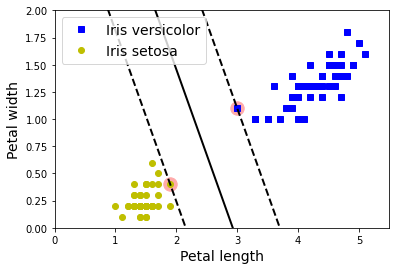

In [26]:
# Plot decision boundary (unscaled)
from sklearn.svm import SVC # support_vectors_

svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plot_svc_decision_boundary(svm_clf, 0, 5.5)

In [ ]:
# Alternative: SVC() or SGDClassifier()

svm_clf2 = Pipeline([
        ('scaler', StandardScaler()), 
        ('svc', SVC(kernel='linear', C=1)) # Default: kernel=rbf, C=1.0
        ])
# LinearSVC is implemented in terms of liblinear rather than libsvm, so it has more flexibility 
# in the choice of penalties and loss functions and should scale better to large numbers of samples.

from sklearn.linear_model import SGDClassifier

sgd_clf = Pipeline([
        ('scaler', StandardScaler()), 
        ('sgd', SGDClassifier(loss='hinge', penalty='l2'))
        ])

#### SVM Loss Function

[What is a Support Vector?](https://programmathically.com/what-is-a-support-vector/)<br>
[Understanding Hinge Loss and the SVM Cost Function](https://programmathically.com/understanding-hinge-loss-and-the-svm-cost-function/)<br>
[Understanding the mathematics behind Support Vector Machines](https://shuzhanfan.github.io/2018/05/understanding-mathematics-behind-support-vector-machines/)<br>
[Demystifying Maths of SVM](https://towardsdatascience.com/demystifying-maths-of-svm-13ccfe00091e) <br>
[Loss Function(Part III): Support Vector Machine](https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-iii-5dff33fa015d) <br>



### Nonlinear SVM Classification

#### Polynomial Features

(100, 2)


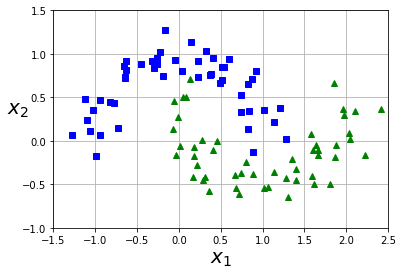

In [ ]:
# Preparing data
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
print(X.shape) # 100 samples with 2 features

# Plot nonlinear data
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^')
plt.grid(True)
plt.axis([-1.5, 2.5, -1, 1.5]) #[xmin, xmax, ymin, ymax]
plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('$x_2$', fontsize=20, rotation=0)
plt.show()

In [ ]:
# Build a pipeline to chain transformers(PolynomialFeatures, StandardScaler) and estimator(LinearSVC)
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ('poly_features', PolynomialFeatures(degree=3)),
        ('scaler', StandardScaler()),
        ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

(100, 100) (100, 100)


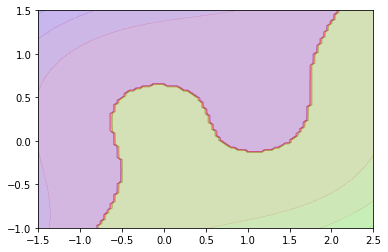

In [ ]:
# Plot decision boundary
import numpy as np

x1s = np.linspace(-1.5, 2.5, 100)
x2s = np.linspace(-1, 1.5, 100)
x1, x2 = np.meshgrid(x1s, x2s) # meshgrid for contourf(X and Y must both be 2D)
print(x1.shape, x2.shape)
X = np.c_[x1.ravel(), x2.ravel()] # c_ concatenates along second axis    

y_pred = polynomial_svm_clf.predict(X).reshape(x1.shape)
y_decision = polynomial_svm_clf.decision_function(X).reshape(x1.shape)

plt.contourf(x1, x2, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x1, x2, y_decision, cmap=plt.cm.brg, alpha=0.1)

#### [Kernel Trick](https://en.wikipedia.org/wiki/Kernel_method)

[What is the kernel trick?](https://medium.com/@zxr.nju/what-is-the-kernel-trick-why-is-it-important-98a98db0961d) <br>
[What is a Kernel in Machine Learning?](https://programmathically.com/what-is-a-kernel-in-machine-learning/)

##### [Polynomial Kernel](https://en.wikipedia.org/wiki/Polynomial_kernel)

##### [Gaussian Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) (Similarity Function)